<a href="https://colab.research.google.com/github/RichardMedina9309/rmedinaExamen/blob/master/AbejasRL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pylab as plt

Lista de puntos en los que se van a mover

In [3]:
listaPuntos = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7)]  #rutas al panas u objetivo 

Dibujar los puntos

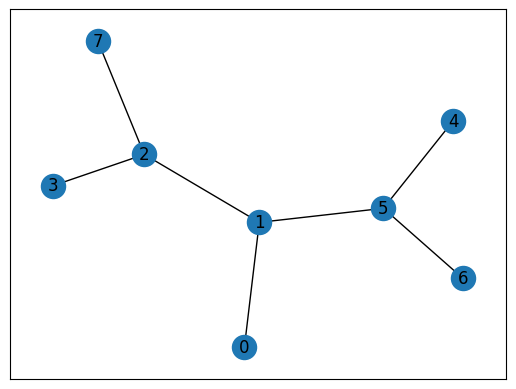

In [4]:
objetivo = 7
import networkx as nx               #Libreria de redes de graphos

g = nx.Graph()
g.add_edges_from(listaPuntos)
pos = nx.spring_layout(g)

nx.draw_networkx_nodes(g, pos)       #Organizar nodos, uniones y etiquetas.
nx.draw_networkx_edges(g, pos)
nx.draw_networkx_labels(g, pos)

plt.show()

In [16]:
  MATRIX_SIZE = 8                 #Máximo número de puntos

In [17]:
R =  np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))    #Matriz de 8x8  de 1nos

In [12]:
R *= -1                                                       #MAtríz con pura pérdida

In [ ]:
for punto in listaPuntos:
  print(punto)
  if punto[1] == objetivo:
    R[punto] = 100 
  else:
      R[punto] = 0

  if punto[0] == objetivo:
    R[punto[:: -1]] = 100
  else:
      R[punto[::-1]] = 0

R [objetivo, objetivo] = 100          

In [ ]:
R

In [33]:
Q = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))
gama = 0.8
estadoInicial = 1

In [22]:
def accionesPosibles(estado):
  estadoActual_fila = R[estado]
  acAvance = np.where(estadoActual_fila>0) [1]

  return acAvance

In [24]:
acDisponible = accionesPosibles(estadoInicial)

In [31]:
def pruebSiguienteAccion(rangoAccionesPosibles):
  acSiguiente = int(np.random.choice(acDisponible,1))
  return acSiguiente

In [32]:
accion = pruebSiguienteAccion(acDisponible)

In [37]:
def actualizar(estadoActual, accion, gama):
  indiceMayor = np.where(Q[accion, ] == np.max(Q[accion, ]))[1]

  if indiceMayor.shape[0] > 1:
    indiceMayor = int(np.random.choice(indiceMayor, sice = 1))
  else:
    indiceMayor = int (indiceMayor)

  valorMaximo = Q[accion, indiceMayor]

  Q[estadoActual, accion] = R[estadoActual, accion] + gamma*valorMaximo

  print('Valor máximo', R[estadoActual, accion] + gamma*valorMaximo)

  if(np.max(Q)>0):
    return(np.sum(Q/np.max(Q)*100))
  else:
    return 0   

In [ ]:
actualizar(estadoInicial, accion, gama)

In [ ]:
#eNTRENAR

puntajes = []

for i in range(700):
  estadoActual = np.random.randint(0, int(Q.shape[0]))
  acDisponible = accionesPosibles(estadoActual)
  accion = pruebSiguienteAccion(acDisponible) 
  puntaje = actualizar(estadoActual, accion, gama)
  puntajes.append(puntaje)

print("Matriz Q, entrenada!!")

print(Q/np.max(Q)*100)

Pruebas

In [ ]:
estadoActual = 0
paso = [estadoActual]


while estadoActual !=7
  indiceSiguientePaso = np.where(Q[estadoActual, ] == np.max(Q[estadoActual, ]))[1]

  if indiceSiguientePaso.shape[0] > 1 :
    indiceSiguientePaso = int(np.random.choice(estadoActual, sice =1))
  else:
    indiceSiguientePaso = int(indiceSiguientePaso)

  paso.append(indiceSiguientePaso)
  estadoActual = indiceSiguientePaso

print("El camino más eficiente: ")
print(paso)

plt.plot(puntajes)
plt.show()
